<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/2024_06_11_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv("https://raw.githubusercontent.com/Annepikson/HypatiaAcademy/master/ml/Life%20Expectancy%20Data.csv")

df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [196]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [197]:
df.columns = df.columns.str.strip()


In [198]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [199]:
df.info()


#$1,200,300


<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [200]:
# not correct
#y = df.rank

y=df['Life expectancy']
type(y)

pandas.core.series.Series

In [201]:
x1 = df['Alcohol']

x1

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
        ... 
2933    4.36
2934    4.06
2935    4.43
2936    1.72
2937    1.68
Name: Alcohol, Length: 1649, dtype: float64

In [202]:
# Handle missing values by filling them with 0
#df['Alcohol'] = df['Alcohol'].fillna(0)

# Convert the 'Alcohol' column to integers
#df['Alcohol'] = df['Alcohol'].astype(int)

In [203]:
import re

def tonumber(n):
    s = str(n)  # Convert the value to strin
    s = re.sub(r'[^0-9.]', '', s)  # Remove all characters except digits and the decimal point
    return int(float(s))  # Convert to float first, then to int
tonumber('0.01')

0

In [204]:
x2 = df['Diphtheria']

# if there is a blank then you can use the average or put a zero or delete the whole row

In [205]:

# what does this do?


#df['Diphtheria'] = df['Diphtheria'].fillna(0)
#df['Diphtheria'] = df['Diphtheria'].astype(int)


In [206]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [207]:
x3 = df['under-five deaths']


In [208]:
x4 = df['percentage expenditure']



In [209]:
#x5 = df['Status']

#df['Status']


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x5=le.fit_transform(df['Status'])

x5

array([1, 1, 1, ..., 1, 1, 1])

In [210]:
# real

#y=df['Life expectancy'].values



In [211]:
#x1=df['Alcohol'].apply(tonumber)


In [212]:
#x2=df['Diphtheria'].apply(tonumber)


In [213]:
#x3=df['under-five deaths'].apply(tonumber)


In [214]:
#x4=df['percentage expenditure'].apply(tonumber)

x6=df['Schooling']
x7=df['infant deaths']
x8=df['Polio']



In [215]:
# now we have x1, x2, x3, ...

# no.column_stack puts them all on one rowe
import numpy as np

X=np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8))
X

array([[ 0.01, 65.  , 83.  , ..., 10.1 , 62.  ,  6.  ],
       [ 0.01, 62.  , 86.  , ..., 10.  , 64.  , 58.  ],
       [ 0.01, 64.  , 89.  , ...,  9.9 , 66.  , 62.  ],
       ...,
       [ 4.43, 71.  , 40.  , ..., 10.  , 25.  , 73.  ],
       [ 1.72, 75.  , 39.  , ...,  9.8 , 25.  , 76.  ],
       [ 1.68, 78.  , 39.  , ...,  9.8 , 24.  , 78.  ]])

In [216]:
# train to means trains to calculate coefficients

# test means to test whether it's working or close or logical


# test is

# Replace NaN with zero
#X[np.isnan(X)] = 0
#y[np.isnan(y)] = 0

# xtrain. use this to build the model.  which will be the lr.fit(xtrain,ytest)
# xyest.  use test to make predictions.  we predict how long someone will live given their alcohol, measels, country


# 50% train 50% test

#xtrain,xtest=np.array_split(X, 2)
#ytrain,ytest=np.array_split(y, 2)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)




In [217]:
xtrain.shape

(1319, 8)

In [218]:
ytrain.shape

(1319,)

In [219]:
X[0]

array([ 0.01      , 65.        , 83.        , 71.27962362,  1.        ,
       10.1       , 62.        ,  6.        ])

In [220]:
np.column_stack([xtrain,ytrain])

array([[  4.5 ,  92.  ,  36.  , ...,  24.  ,  88.  ,  54.1 ],
       [  1.08,  93.  ,  54.  , ...,  35.  ,  86.  ,  52.9 ],
       [  6.5 ,  91.  ,  34.  , ...,  23.  ,  92.  ,  59.2 ],
       ...,
       [  9.95,  96.  ,   1.  , ...,   0.  ,  96.  ,  79.3 ],
       [  1.08,  84.  ,   0.  , ...,   0.  ,  86.  ,  72.5 ],
       [  0.01,  77.  , 202.  , ..., 140.  ,  75.  ,  64.2 ]])

In [221]:
# create model

reg = LinearRegression()

# train model.  which means calculate coefficients and y-intercept

reg.fit(xtrain, ytrain)

LinearRegression()

In [222]:
np.set_printoptions(suppress=True, precision=10)

print('Coefficients: \n', reg.coef_)
print('\n Intercept: \n', reg.intercept_)



Coefficients: 
 [-0.2414128389  0.0193592269 -0.110413986   0.0006692697 -2.603248872
  1.9744544167  0.1475275839  0.0143561681]

 Intercept: 
 45.49319462638117


In [223]:
ytrain

425     54.1
1575    52.9
2923    59.2
1140    74.3
1002    79.8
        ... 
340     62.2
1766    55.3
1036    79.3
2639    72.5
883     64.2
Name: Life expectancy, Length: 1319, dtype: float64

In [224]:
xtrain.shape

(1319, 8)

In [225]:
xtrain[0,0]

4.5

In [226]:
xtrain[0]

array([ 4.5       , 92.        , 36.        , 21.24915339,  1.        ,
        5.9       , 24.        , 88.        ])

In [227]:
# we don't use train.  because RULE.  RULE says don't make predictions on the data you used to train the model

# we use test data to test accuracy


ypred = reg.predict(xtest)

In [228]:
ypred[0]

73.22172355706901

In [229]:
# y (life expectacty) = m1 * alcohol....

reg.coef_[0] * xtrain[0,0] + reg.coef_[1] * xtrain[0,1] + reg.coef_[2] * xtrain[0,2] + reg.coef_[3] * xtrain[0,3] + reg.coef_[4] * xtrain[0,4] + reg.intercept_

39.62395477344898

In [230]:
xtrain[0]

array([ 4.5       , 92.        , 36.        , 21.24915339,  1.        ,
        5.9       , 24.        , 88.        ])

In [231]:
xtest[0]

array([14.44      , 98.        ,  1.        ,  8.49409518,  1.        ,
       15.5       ,  0.        , 99.        ])

In [232]:
ytest.shape

(330,)

In [233]:
ypred.shape

(330,)

In [234]:
# illogical

# I am comparing apples and oranges

# I think I am comparing for example Estonia and Africa
# I am calculting Nigeria and checking the error against Estonia

# if you model is perfect.  the r2 is 1

# if it is close to zero then your model is not right




print('Mean squared error: %.2f' % mean_squared_error(ytest, ypred))

print('Coefficient of determination: %.2f' % r2_score(ytest, ypred))

Mean squared error: 33.03
Coefficient of determination: 0.59


In [240]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [235]:
Z= np.column_stack([xtest,ytest,ypred])

# why it this not logical, because we can't plot xtests because it has many columns

#xtests=xtest[0:20]

# ytests is actual life expectancy

ytests=ytest[0:20]

# ypreds is predicted life expectancy

ypreds=ypred[0:20]

xs=np.arange(0,20)

In [246]:
xs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [245]:
ytest.shape

(330,)

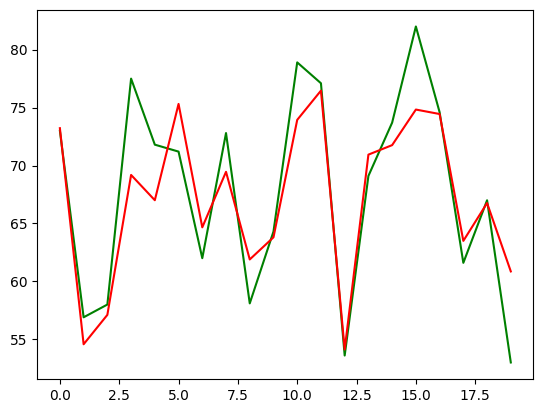

In [243]:
plt.plot(xs,ytests,color='green')
plt.plot(xs,ypreds,color='red')
plt.show()

In [239]:
np.arange(0,20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

# What could be wrong

1.  it could be wrong to say that the data is correlated linear, it could be exponential

2.  the data could me invalid, for example we have too many zeroes, we converted all NaN data to 0

3.  there could be a code error

4.  we add more columns



